Classification d'image(avion ou hélicoptère)

Importer tous les packages utiles 

In [6]:
import pathlib
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import cv2
import numpy as np

#trouvons le path qui contient l'image
train_data_dir = pathlib.Path("C:/Users/eddy/Documents/ia/modelIA/images/train")
validation_data_dir = pathlib.Path("C:/Users/eddy/Documents/ia/modelIA/images/validation")

print(train_data_dir)
#total de l'images
total = len(list(train_data_dir.glob('*/*')))
print( total)

C:\Users\eddy\Documents\ia\modelIA\images\train
51


In [7]:
#preprocessing
batch_size = 3 #analyser l'image en 3 par 3
image_height = 200 
image_width = 200

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 42,
    image_size = (image_height, image_width),
    batch_size = batch_size
)

#creation du jeu de validation
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    validation_data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 42,
    image_size = (image_height, image_width),
    batch_size = batch_size
)

class_names = val_data.class_names
print(class_names)


Found 51 files belonging to 2 classes.
Using 41 files for training.
Found 15 files belonging to 2 classes.
Using 3 files for validation.
['Helicoptere', 'avion']


Afficher les 3 premiers des images entrées dans le train_data

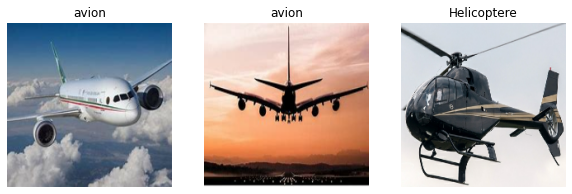

In [8]:
plt.figure(figsize=(10, 10))
for image, labels in train_data.take(1):
    for i in range(3):
        ax = plt.subplot(1, 3, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

Definir notre reseau de neurone convolutionel

In [9]:
from tensorflow.keras import layers

num_classes = 2

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(128,4, activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,4, activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4, activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(16,4, activation = "relu"),
    layers.MaxPooling2D(),
    layers.Flatten(), #Création du vecteur è partir de la matrice
    layers.Dense(64, activation = "relu"),
    layers.Dense(num_classes, activation = "softmax")# on va avoir la probabilité entre nos differentes classes
])

In [10]:
model.compile(optimizer = "adam", loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy']
              )

In [11]:
logdir = "logs"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir = logdir, histogram_freq = 1,write_images = logdir, embeddings_data = train_data)

In [12]:
model.fit(
    train_data,
    validation_data = val_data,
    epochs = 20,
    callbacks = [tensorboard_callback]
)

Epoch 1/20


C:\Users\eddy\anaconda3\envs\tensorflow36\lib\site-packages\keras\backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


14/14 [==============================] - 30s 2s/step - loss: 0.7161 - accuracy: 0.4146 - val_loss: 0.6765 - val_accuracy: 0.6667
Epoch 2/20
14/14 [==============================] - 24s 2s/step - loss: 0.6995 - accuracy: 0.5610 - val_loss: 0.7062 - val_accuracy: 0.3333
Epoch 3/20
14/14 [==============================] - 24s 2s/step - loss: 0.6532 - accuracy: 0.6341 - val_loss: 0.7960 - val_accuracy: 0.3333
Epoch 4/20
14/14 [==============================] - 25s 2s/step - loss: 0.7171 - accuracy: 0.6098 - val_loss: 0.7065 - val_accuracy: 0.3333
Epoch 5/20
14/14 [==============================] - 24s 2s/step - loss: 0.6499 - accuracy: 0.6341 - val_loss: 0.6189 - val_accuracy: 0.6667
Epoch 6/20
14/14 [==============================] - 25s 2s/step - loss: 0.5634 - accuracy: 0.7073 - val_loss: 0.5793 - val_accuracy: 1.0000
Epoch 7/20
14/14 [==============================] - 24s 2s/step - loss: 0.5434 - accuracy: 0.8049 - val_loss: 0.4981 - val_accuracy: 0.6667
Epoch 8/20
14/14 [=============

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 197, 197, 128)     6272      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 95, 95, 64)        131136    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 32)        32800     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0

prédiction

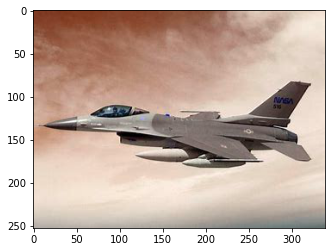

(1, 200, 200, 3)
votre image est un avion!


In [14]:
#path vers l'image à predire
image_a_predire = cv2.imread("images/validation/avion/avion.jpeg",cv2.IMREAD_COLOR)
plt.imshow(image_a_predire)

plt.show()
img_a_predire = np.expand_dims(cv2.resize(image_a_predire, (200, 200)), axis = 0)
print(img_a_predire.shape)
predictions = model.predict(img_a_predire)
#res = model.predict(img_a_predire)
#print(model.predict(img_a_predire))
thresold = 0.5
predict = (predictions>thresold).astype('int')
#si predict[0][0] = 1 : l"image est un helicoptere, si non: c'est un avion; 
if predict[0][0] == 1 :
    print("votre image est un hélicoptère!")


else:
    print('votre image est un avion!')
    